In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as lng # linear algebra from scipy library
from sklearn import preprocessing as preproc # load preprocessing function
import pandas as pd
# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

from sklearn.linear_model import LinearRegression
from scipy import linalg
from sklearn.impute import SimpleImputer

In [2]:
import scipy.io
import numpy as np
from sklearn import linear_model 
from scipy import linalg
from sklearn import preprocessing as preproc # load preprocessing function
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from scipy.stats import linregress
from sklearn.model_selection import KFold
from statsmodels.sandbox.stats.multicomp import multipletests 
import warnings # to silence convergence warnings

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

from pathlib import Path

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [72]:
path = Path().cwd()
data_file = path / "Data" / "HR_data.csv"
df = pd.read_csv(data_file)
# Drop the first column
df = df.drop(df.columns[0], axis=1)
n, p = df.shape

In [73]:
print(n,p)

312 67


In [74]:
# Check for missing variables
missing_values = df.isna().sum()
# Print the count of missing values for each variable
print("Missing Variables:")
print(missing_values[missing_values > 0])

Missing Variables:
EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64


In [140]:
df.iloc[:,:48]

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,EDA_TD_T_std,EDA_TD_T_Min,EDA_TD_T_Max,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope
0,78.663878,76.700,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.730000,0.9775,...,0.003744,0.169440,0.186816,213.374114,1.345997,-1.379434,-0.000144,0.000138,0.000010,1.036040e-05
1,76.540732,76.610,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.360000,0.1900,...,0.002976,0.164504,0.179273,213.235380,0.887010,0.854067,-0.000146,0.000165,0.000009,7.714503e-06
2,78.173563,77.920,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.630000,0.3575,...,0.002266,0.162036,0.172624,173.465157,0.205817,0.480581,-0.000112,0.000132,0.000002,1.799914e-06
3,83.073688,83.880,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.465000,0.6500,...,0.004789,0.148368,0.175496,191.943390,2.488339,1.246665,-0.000455,0.000481,-0.000001,-1.355151e-07
4,72.281250,72.910,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.372500,0.3375,...,0.006473,0.143003,0.168106,192.341180,1.196508,1.592099,-0.000420,0.000334,0.000014,1.267198e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,82.019065,78.830,8.794206,69.73,97.18,26244.705,-1.386324,0.251382,-0.517500,0.3525,...,0.460463,0.638900,2.440594,1520.392042,0.171319,1.118577,-0.017405,0.026962,0.001028,1.031675e-03
308,103.274248,104.625,14.208117,68.13,125.52,31523.695,-0.338091,-0.521254,-0.962500,1.0875,...,0.209849,0.886025,1.786140,1467.283545,0.091560,0.897960,-0.006757,0.012551,0.000182,1.786715e-04
309,99.065000,97.490,10.079197,86.55,119.75,28235.230,-0.740136,0.629730,-0.657500,0.9175,...,0.378600,1.275946,2.813654,2267.175040,-0.802297,0.123009,-0.017583,0.019661,-0.000374,-2.707034e-04
310,91.793354,97.180,19.234169,60.90,120.67,28909.835,-1.229115,-0.181431,-0.717500,0.9800,...,0.716485,0.495462,2.551506,1600.292935,-1.182989,0.589572,-0.009955,0.019436,0.001485,1.480688e-03


In [131]:
# Filter the DataFrame to include only the data points with category "round_1" in parameter "round"
filtered_df = df[df['Round'] == 'round_1']

# Use decomposition and subspace methods to investigate low-dimension representation of the data

We're looking for structure in the data, outlier detection, and dimensionality reduction

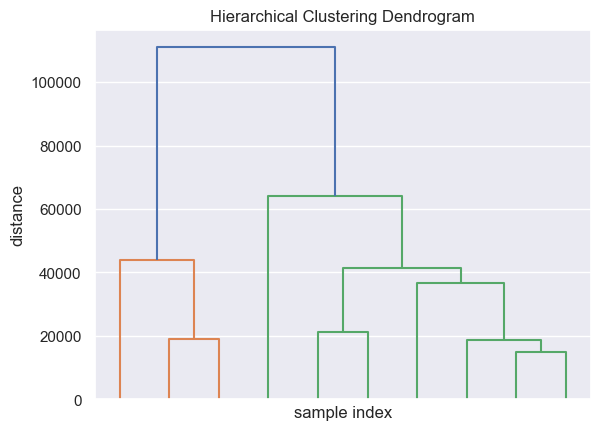

In [141]:
#For additional information concerning heirachical clustering in python, look at;
#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

d_sample = 'euclidean' #See possible values: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
d_group = 'ward' #See possible values (method): https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
N_leafs = 10 #Number of leaf nodes. n=400

Z = linkage(filtered_df.iloc[:,:49], method=d_group, metric=d_sample) #method denotes cluster distance, metric denotes sample distance

plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

#for scipy dendogram look at;
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

den = dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
    truncate_mode='lastp',
    p = N_leafs,
    no_labels = True
)
plt.show()

In [142]:
#look at the individual clusters
responseLabels = np.array(filtered_df.iloc[:,52:53]).squeeze()
#print(filtered_df.iloc[:,52:53])
k=3 #Number of clusters. Determine a usable number from dendrogram

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)
    print('The labels associated with cluster {} is:'.format(i))
    print(responseLabels[datapoints])
    print('\n')

The labels associated with cluster 1 is:
['phase3' 'phase2' 'phase3' 'phase3' 'phase2' 'phase1' 'phase3' 'phase2'
 'phase1' 'phase1']


The labels associated with cluster 2 is:
['phase1' 'phase1' 'phase1' 'phase1' 'phase1' 'phase1' 'phase2' 'phase2']


The labels associated with cluster 3 is:
['phase3' 'phase2' 'phase1' 'phase3' 'phase2' 'phase1' 'phase3' 'phase2'
 'phase1' 'phase3' 'phase2' 'phase1' 'phase3' 'phase2' 'phase1' 'phase3'
 'phase2' 'phase1' 'phase3' 'phase2' 'phase3' 'phase2' 'phase3' 'phase2'
 'phase3' 'phase2' 'phase3' 'phase2' 'phase3' 'phase2' 'phase3' 'phase1'
 'phase3' 'phase2' 'phase1' 'phase1' 'phase3' 'phase1' 'phase2' 'phase1'
 'phase3' 'phase2' 'phase3' 'phase2' 'phase1' 'phase3' 'phase2' 'phase1'
 'phase3' 'phase2' 'phase1' 'phase3' 'phase2' 'phase1' 'phase3' 'phase2'
 'phase1' 'phase3' 'phase2' 'phase1']




In [124]:
# Assuming you have already defined the DataFrame df, cluster_designation, and the cluster number you want to examine
cluster_number = 1  # Specify the cluster number you want to examine

# Filter the DataFrame to include only the data points belonging to the specified cluster
cluster_data = filtered_df[cluster_designation == cluster_number]

# Display the data in the specified cluster
print("Data points in cluster {}:".format(cluster_number))
print(cluster_data)

Data points in cluster 1:
     HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
1     76.540732        76.610   2.584756      69.82      82.33  23959.920   
4     72.281250        72.910   3.193762      64.95      79.98  23052.100   
7     76.542762        75.580   5.519411      66.88      85.70  24034.395   
10    73.961289        71.530   5.500071      67.37      87.83  23448.860   
19    71.348408        70.230   6.355799      61.32      81.13  22332.450   
22    70.419060        68.580   4.495814      66.33      82.47  22393.655   
31    71.107055        69.900   5.627870      60.58      81.75  21900.670   
73    71.070125        70.570   2.627283      67.12      78.22  22668.625   
79    72.767083        72.850   2.676749      66.25      77.12  22628.750   
85    75.014317        75.820   3.738867      65.42      81.50  24077.575   
88    72.082893        72.335   4.596589      62.78      81.72  22845.310   
91    66.121853        65.070   4.818594      59.1

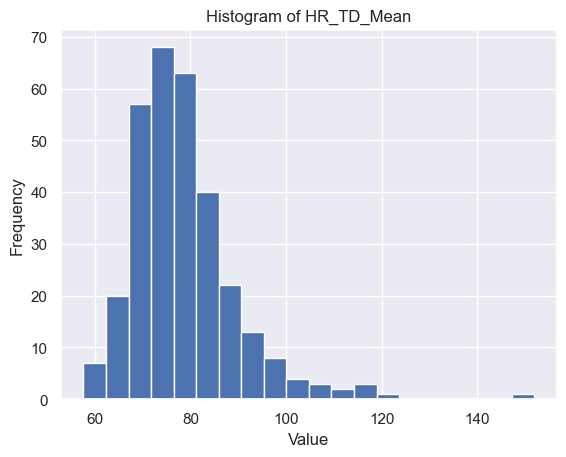

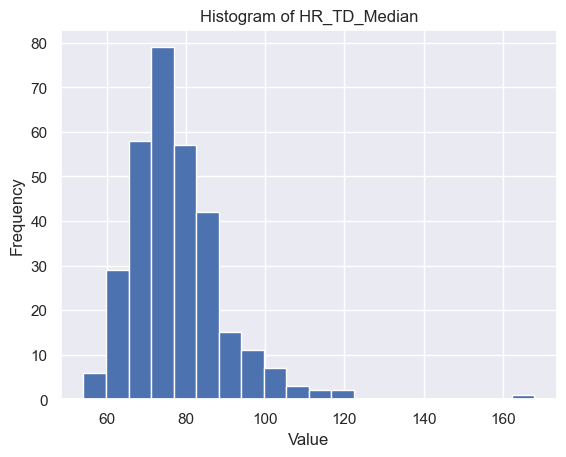

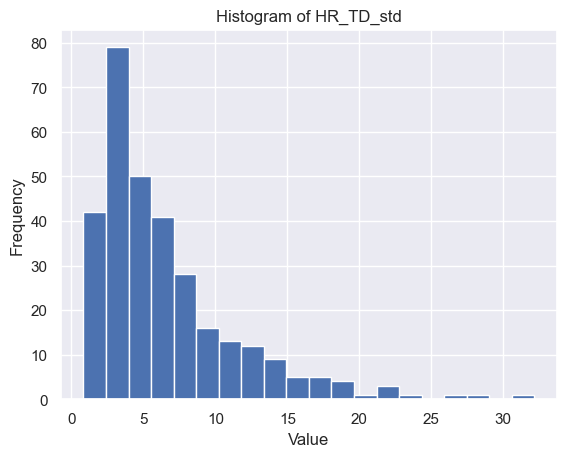

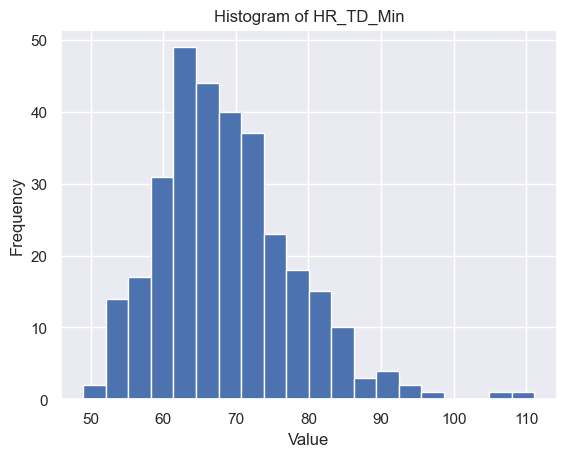

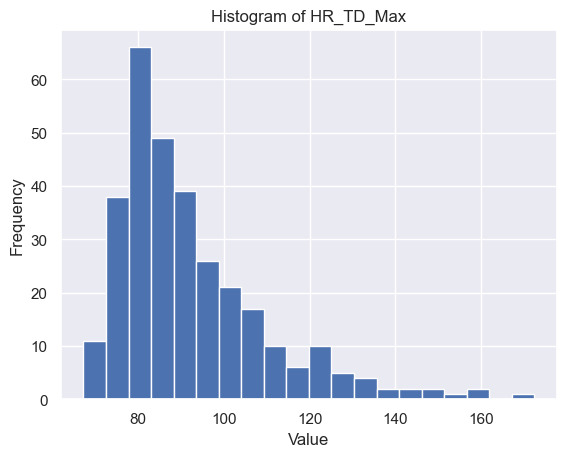

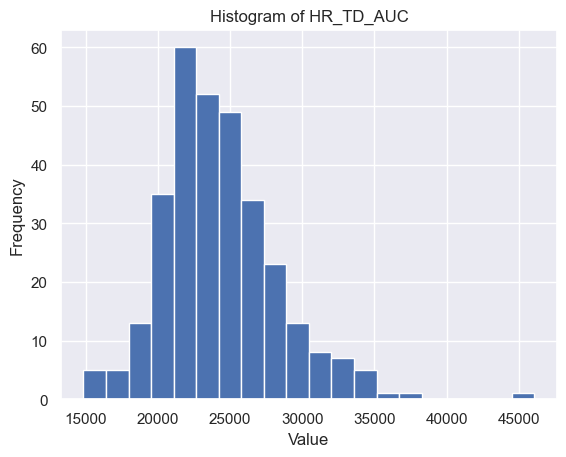

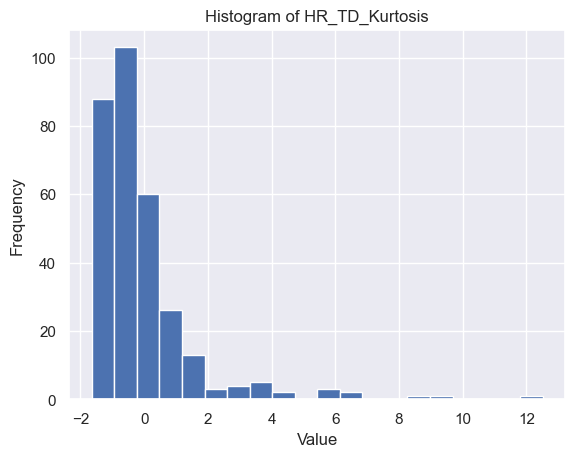

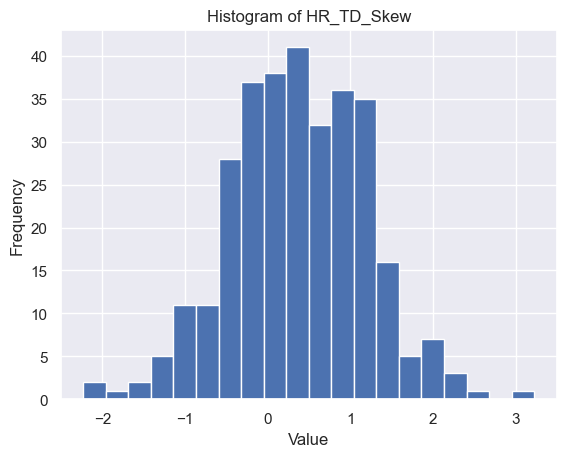

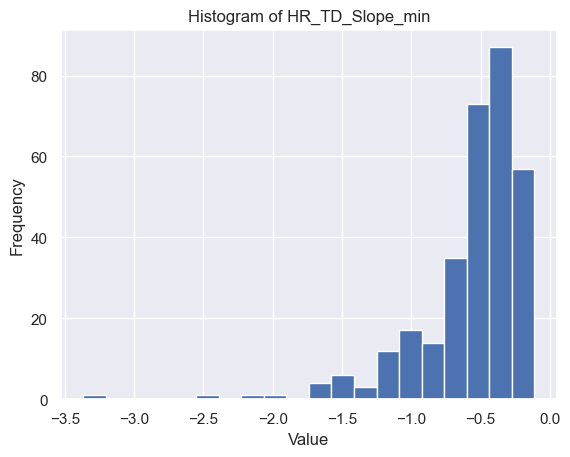

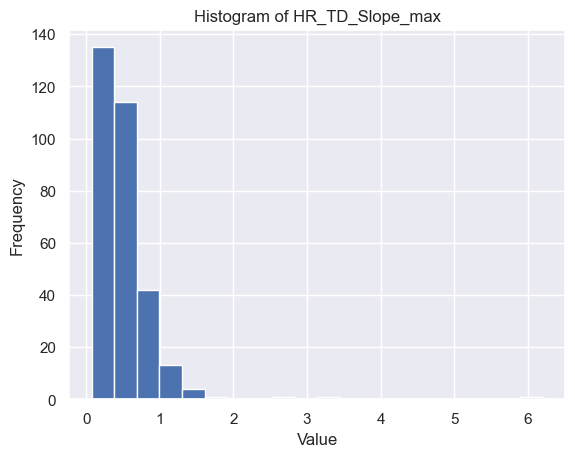

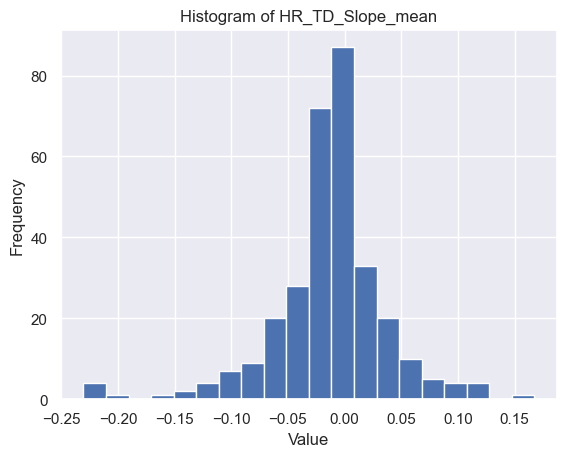

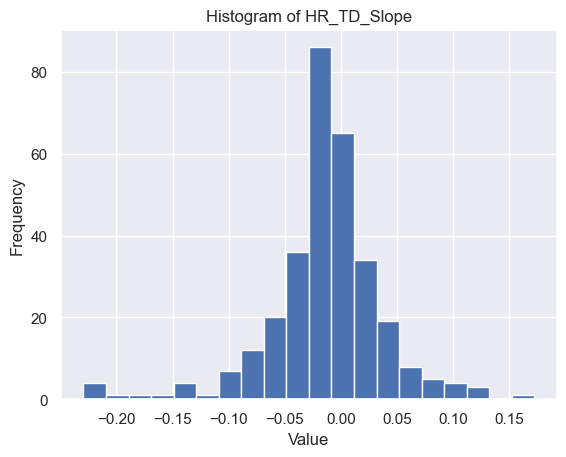

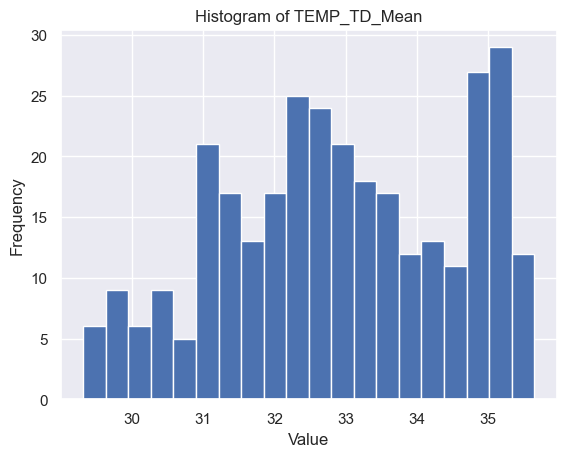

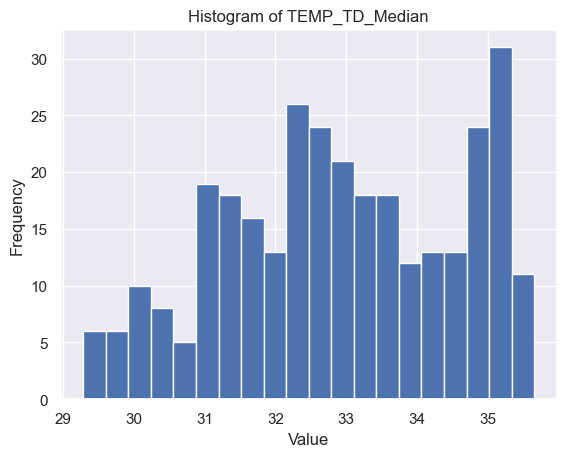

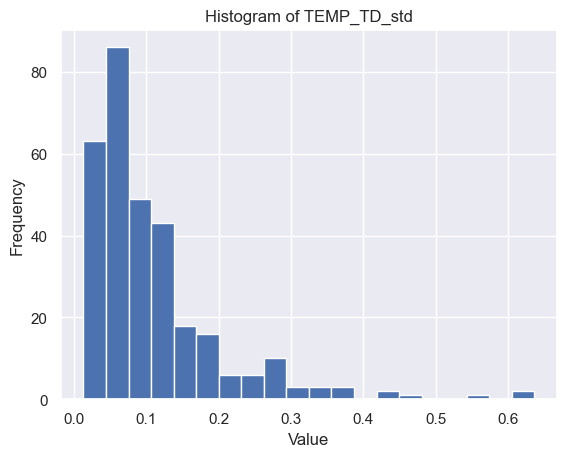

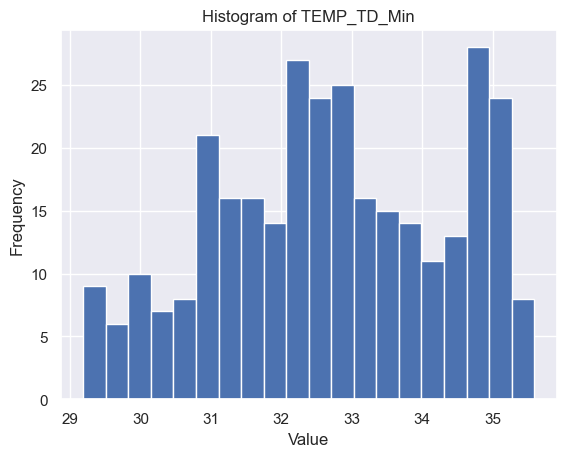

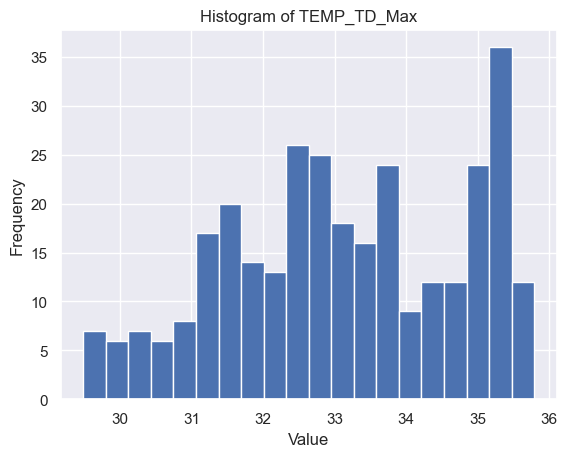

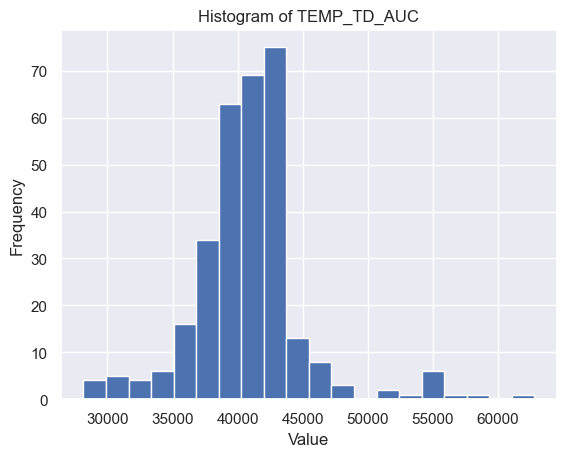

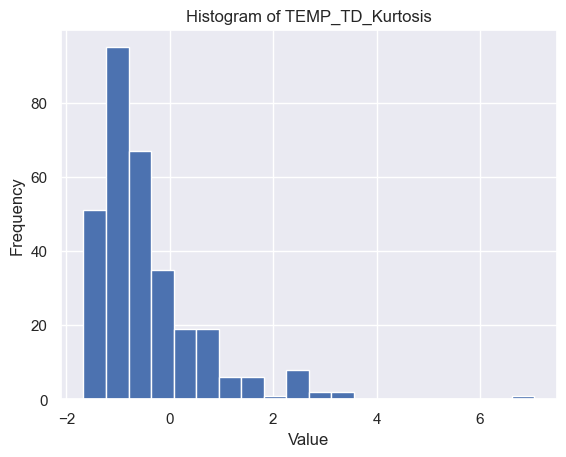

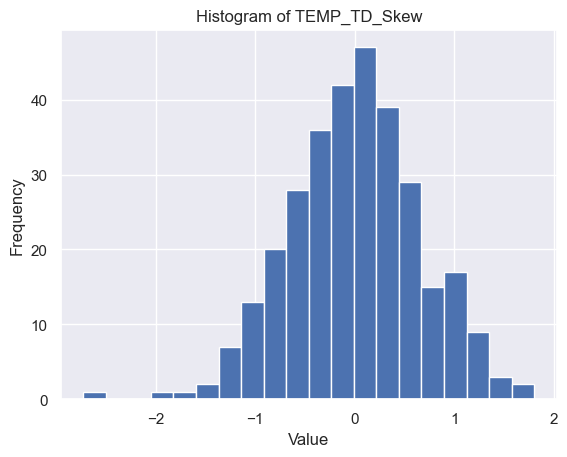

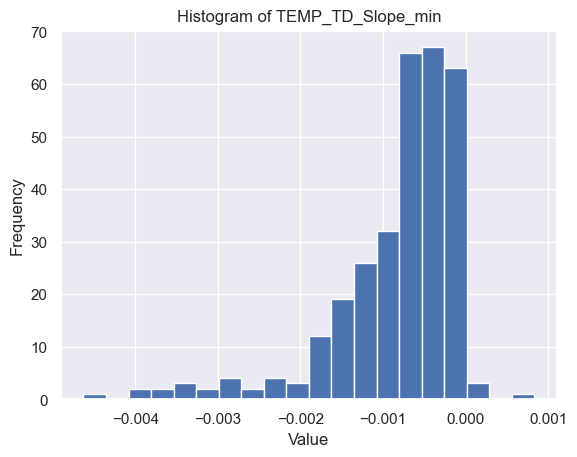

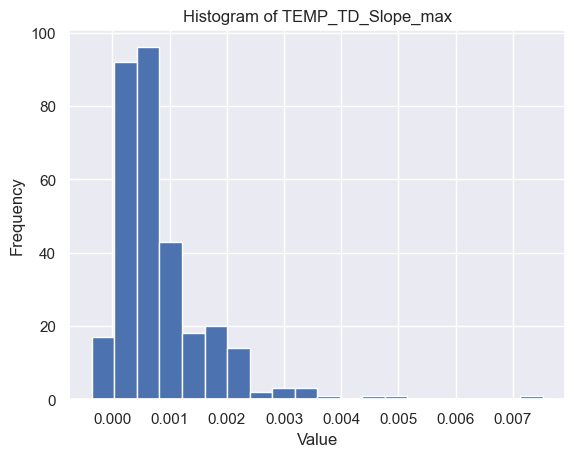

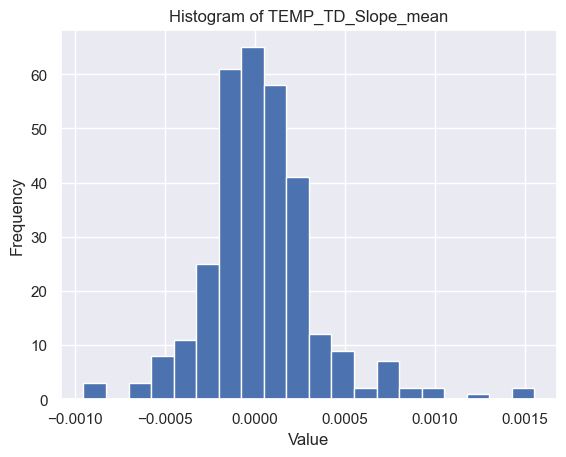

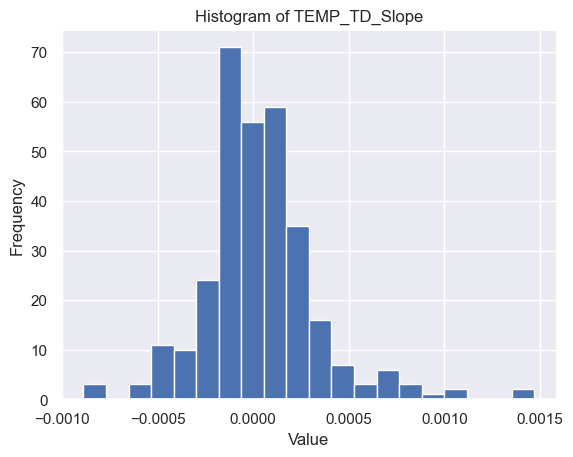

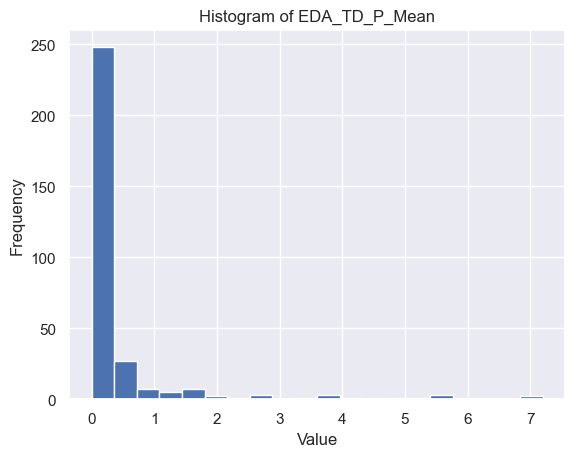

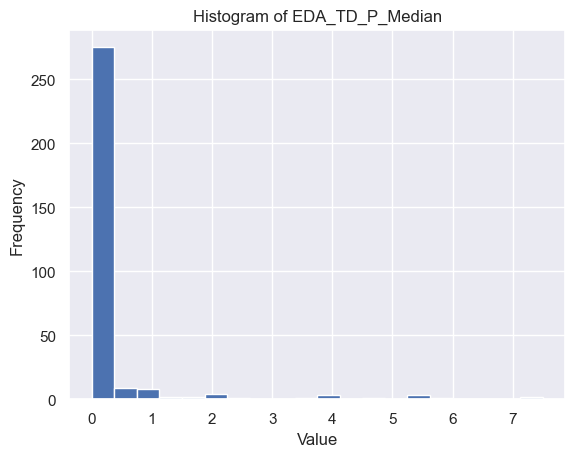

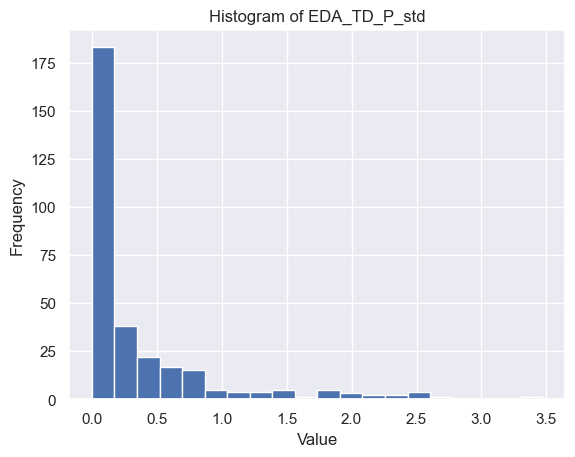

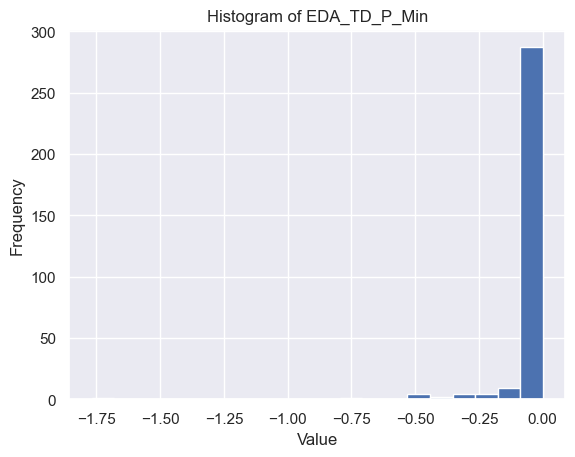

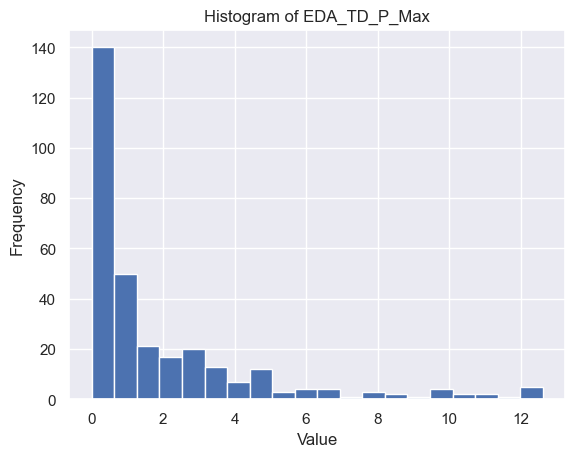

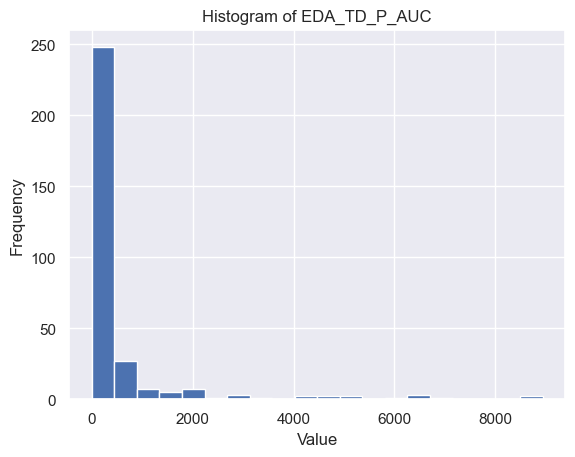

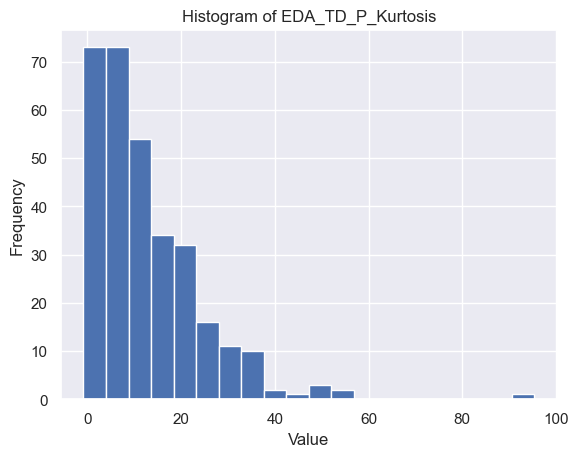

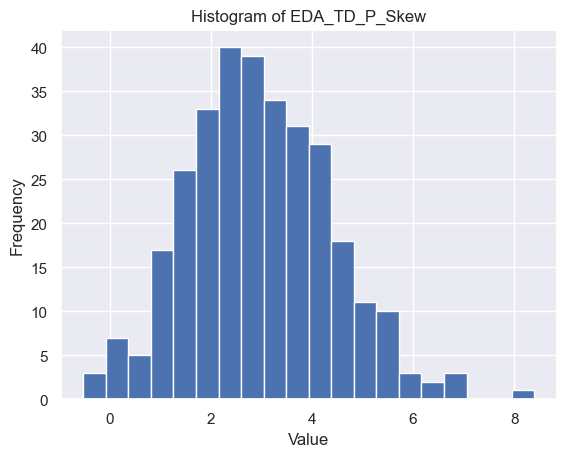

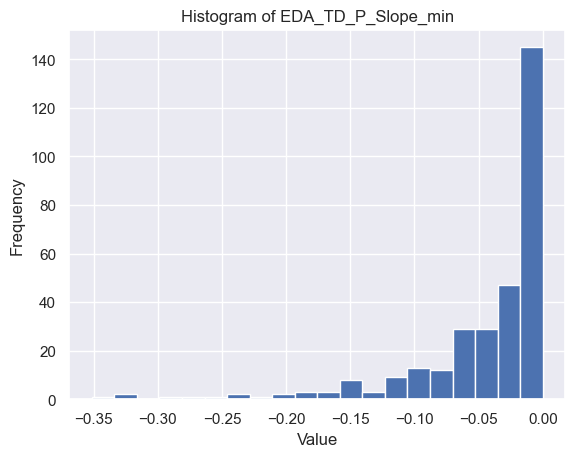

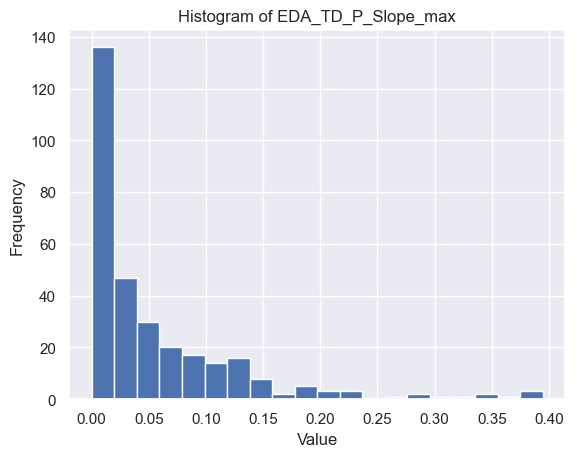

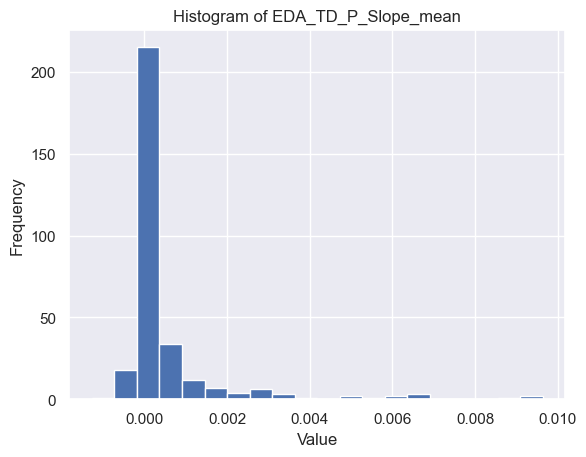

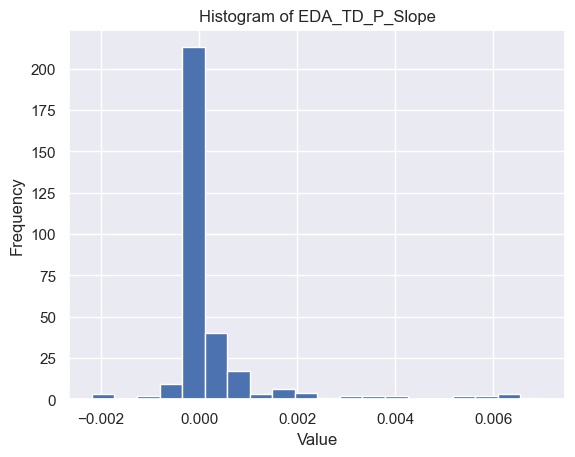

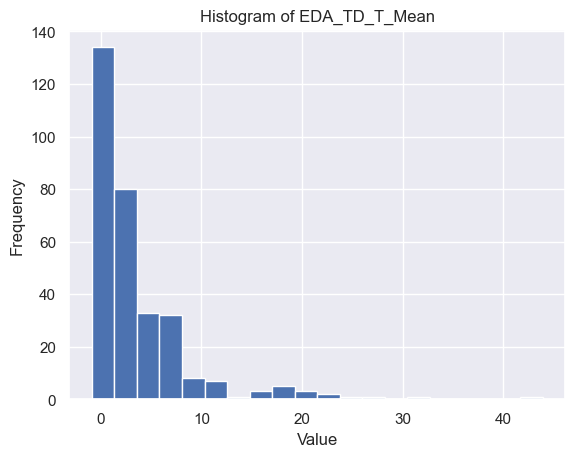

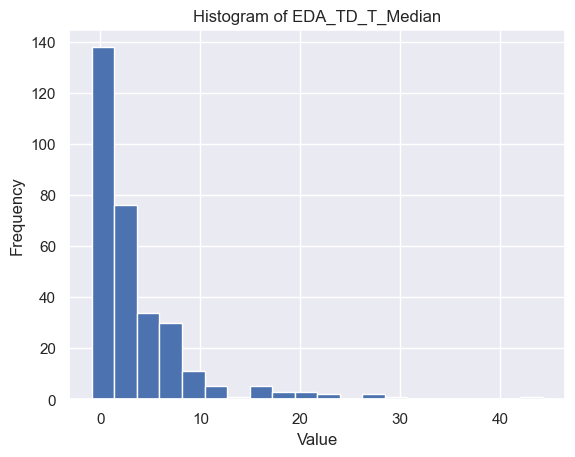

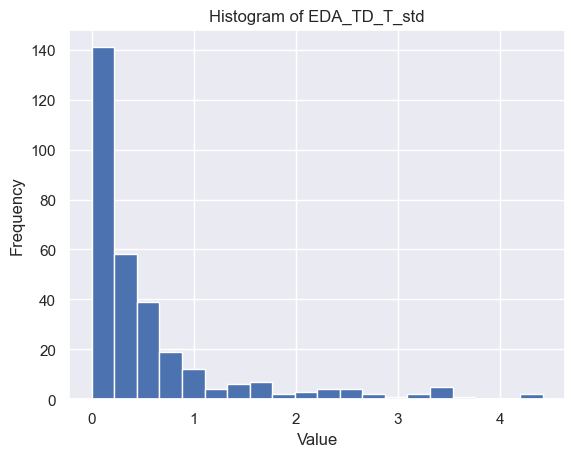

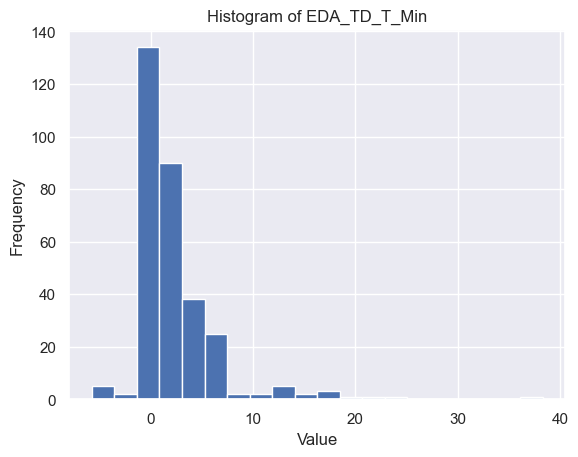

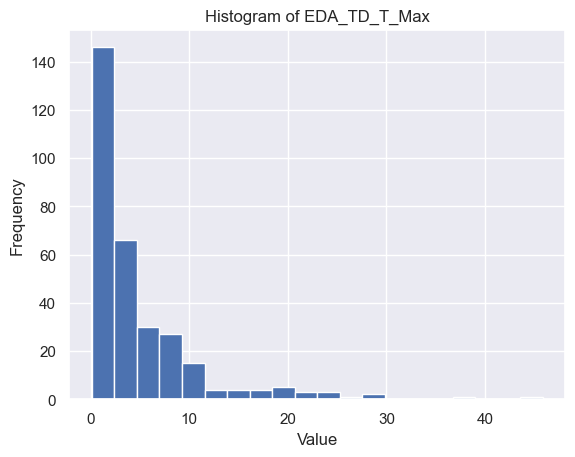

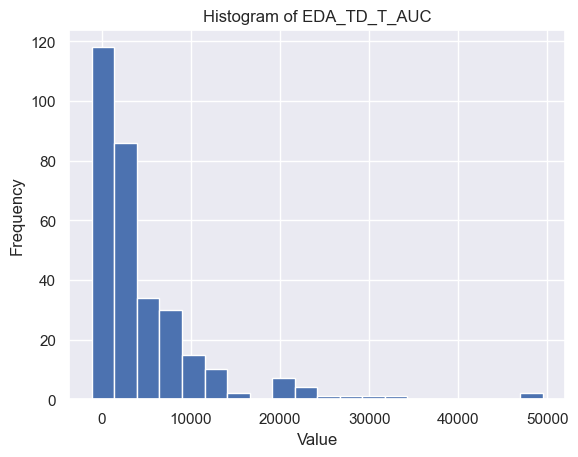

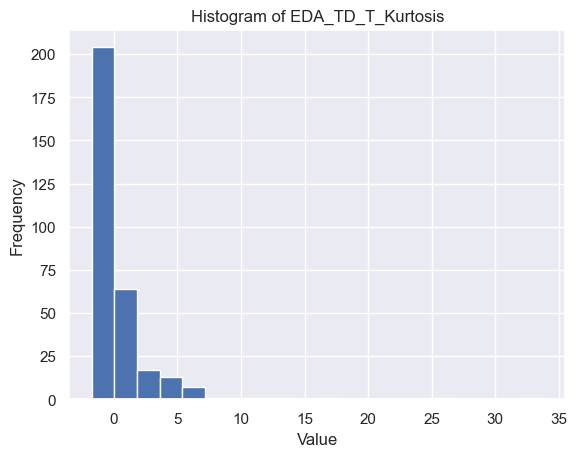

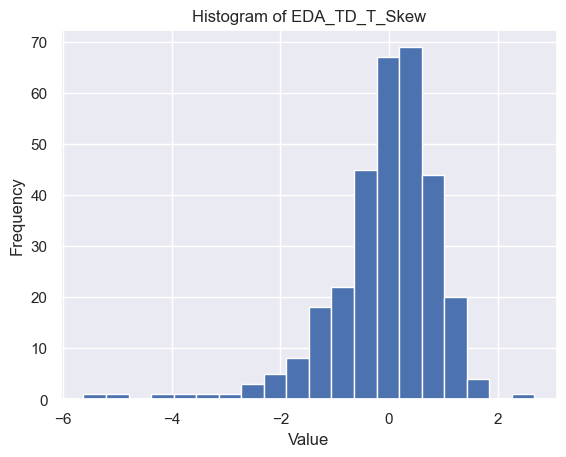

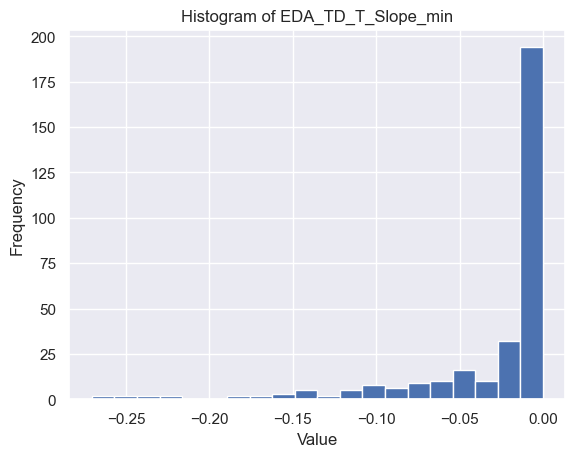

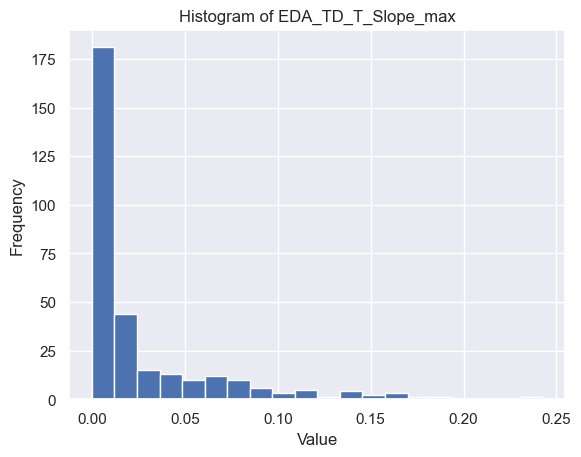

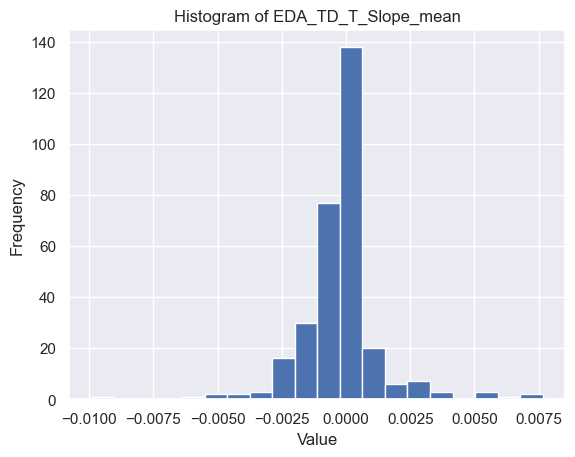

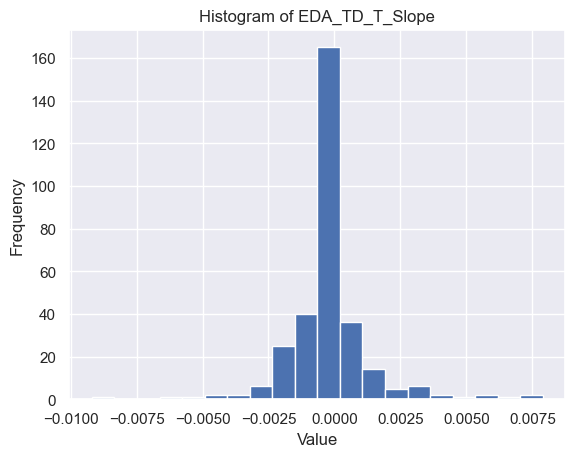

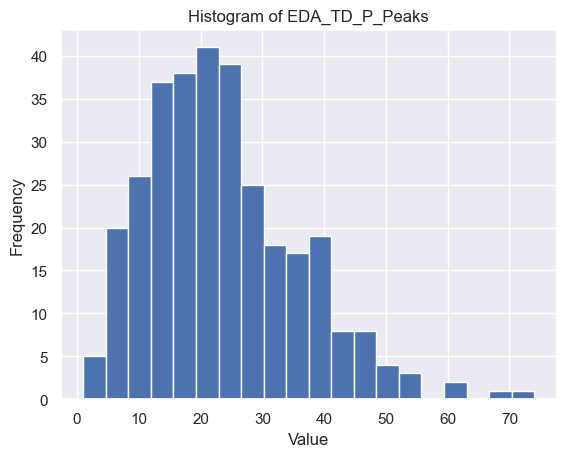

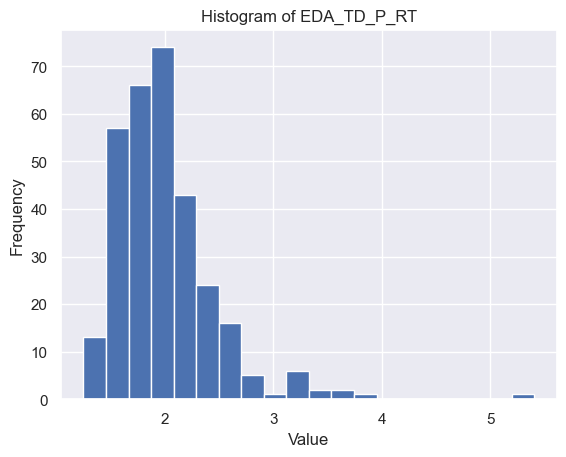

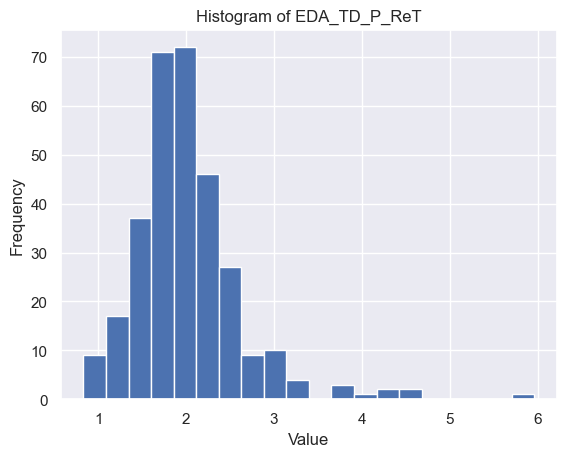

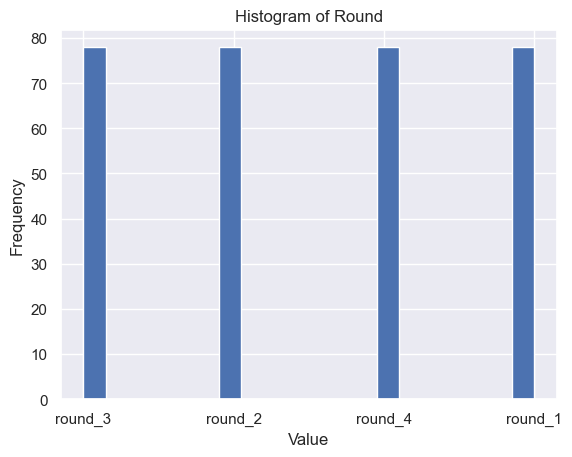

In [60]:
# Iterate over each column in the DataFrame
for column in df.columns[1:53]:
    try:
        # Plot histogram for the column
        plt.hist(df[column], bins=20)  # You can adjust the number of bins as needed
        plt.title(f'Histogram of {column}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()
    except Exception as e:
        print(f"Error plotting histogram for column '{column}': {e}")